## Import packages
Make sure you installed ***sklearn***, ***matplotlib*** and ***numpy*** if you use your local machine

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

## Prepare dataset
The 20 newsgroups text dataset: [Details](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)

In [2]:
dataset = sklearn.datasets.fetch_20newsgroups()

### See some examples and classes

In [3]:
print(dataset.data[0])
print(dataset.data[1])
print(dataset.data[3])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.wa

In [4]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

## Count Vectorizer
Convert a list of text documents to a matrix of token (word) frequencies ([Details](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html))

Example

In [5]:
example_docs=[
       "One Cent, Two Cents, Old Cent, New Cent: All About Money (Cat in the Hat's Learning Library",
       "Inside Your Outside: All About the Human Body (Cat in the Hat's Learning Library)",
       "Oh, The Things You Can Do That Are Good for You: All About Staying Healthy (Cat in the Hat's Learning Library)",
       "On Beyond Bugs: All About Insects (Cat in the Hat's Learning Library)",
       "There's No Place Like Space: All About Our Solar System (Cat in the Hat's Learning Library)" 
      ]

In [6]:
#Create the transform
vectorizer = CountVectorizer()

#Tokenize and build vocab
vectorizer.fit(example_docs)

CountVectorizer()

In [7]:
#Summarize
print(vectorizer.vocabulary_)

{'one': 28, 'cent': 8, 'two': 40, 'cents': 9, 'old': 26, 'new': 23, 'all': 1, 'about': 0, 'money': 22, 'cat': 7, 'in': 16, 'the': 37, 'hat': 13, 'learning': 19, 'library': 20, 'inside': 18, 'your': 42, 'outside': 30, 'human': 15, 'body': 4, 'oh': 25, 'things': 39, 'you': 41, 'can': 6, 'do': 10, 'that': 36, 'are': 2, 'good': 12, 'for': 11, 'staying': 34, 'healthy': 14, 'on': 27, 'beyond': 3, 'bugs': 5, 'insects': 17, 'there': 38, 'no': 24, 'place': 31, 'like': 21, 'space': 33, 'our': 29, 'solar': 32, 'system': 35}


In [ ]:
### Create vector representation of documents

In [8]:
X = vectorizer.transform(example_docs)
print(X.toarray())

[[1 1 0 0 0 0 0 1 3 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0
  0 1 0 0 1 0 0]
 [1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 2 0 0 0 0 1]
 [1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
  1 2 0 1 0 2 0]
 [1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1
  0 1 1 0 0 0 0]]


In [ ]:
## Plot Histogram

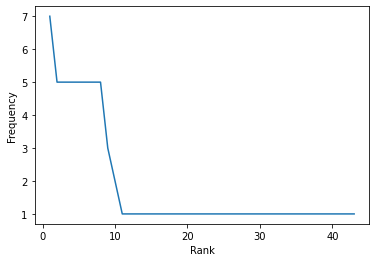

In [9]:
sum_mat = np.sum(X, axis=0)
freqs = np.sort(sum_mat).T[::-1]
plt.plot(list(range(1, sum_mat.shape[1] + 1)), freqs)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

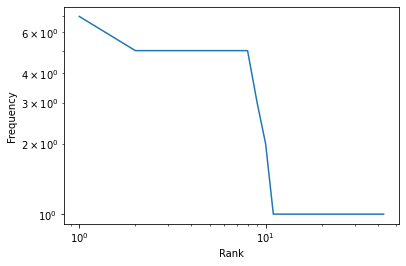

In [10]:
plt.loglog(list(range(1, sum_mat.shape[1] + 1)), freqs)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

## Count Vectorizer
- load a scikit-learn dataset (20 newsgroups)
- run count vectorizer on it
- plot histograms of counts etc.
- vary the parameters of Cvectorizer, show how histograms change

### Split into train and test datasets
Here, 70% of the original data are used for training models, and the rest are for test

In [11]:
class Dataset:
  def __init__(self, dataset, start_idx, end_idx):
    self.data = dataset.data[start_idx:end_idx]
    self.labels = dataset.target[start_idx:end_idx]
    self.vecs = None

    
def split_dataset(dataset, train_rate=0.7):
  data_size = len(dataset.data)
  train_last_idx = int(train_rate * data_size)
  train = Dataset(dataset, 0, train_last_idx)
  test = Dataset(dataset, train_last_idx, data_size)
  return train, test

In [12]:
train, test = split_dataset(dataset)
print('train data size:', len(train.data))
print('test data size:', len(test.data))

train data size: 7919
test data size: 3395


In [29]:
train

### Create the vector representation of training and testing data

In [102]:
#Encode documents
#default parameters
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(train.data)
train.vecs = vectorizer.transform(train.data)
test.vecs = vectorizer.transform(test.data)

In [ ]:
#Adjusted parameters


### Convert word to index and vice versa

In [103]:
def word2idx(word, vocab_dict):
  index = vocab_dict[word] if word in vocab_dict.keys() else 'Not Found'
  print(word, ' -> ', index)


def idx2word(index, vocabs):
  word = vocabs[index] if 0 <= index < len(vocabs) else 'Not Found'
  print(index, ' -> ', word)

In [104]:
vocab_dict = vectorizer.vocabulary_
vocabs = vectorizer.get_feature_names()

word2idx('display', vocab_dict)
idx2word(4926, vocabs)

word2idx('google', vocab_dict)
idx2word(1, vocabs)

display  ->  38892
4926  ->  1938
google  ->  Not Found
1  ->  000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### See vocaburary size

In [105]:
print('Vocaburary Size:', len(vocab_dict))

Vocaburary Size: 106902


In [106]:
def sentence2vec(sentence, vectorizer):
  vec = vectorizer.transform([sentence])
  vocabs = vectorizer.get_feature_names()
  print('\"', sentence, '\" -> ')
  print(vec)
  for idx in vec.indices:
    print(idx, vocabs[idx])

In [107]:
sentence2vec('A fair fair number of brave', vectorizer)

" A fair fair number of brave " -> 
  (0, 27857)	1
  (0, 44299)	2
  (0, 72384)	1
27857 brave
44299 fair
72384 number


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [108]:
word2idx('anteaters', vocab_dict)

anteaters  ->  Not Found


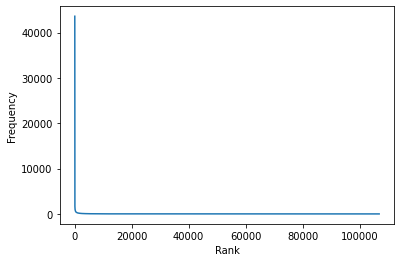

In [109]:
sum_mat = np.sum(train.vecs, axis=0)
freqs = np.sort(sum_mat).T[::-1]
plt.plot(list(range(1, sum_mat.shape[1] + 1)), freqs)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

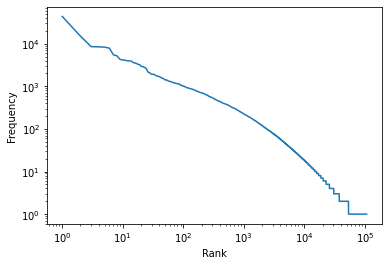

In [110]:
plt.loglog(list(range(1, sum_mat.shape[1] + 1)), freqs)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

### Play with Vectorizer parameters
Back to CountVectorizer() to try other values for the parameters.



## Classification

- train and predict on train+test data
- compute different metrics (train and test)
- contigency table
- compute PR curve
- change parameters of CVectorizer, see how metrics/curves change
- change parameters of classifier (like regularization), see how metrics/curves change.. like overfitting

In [111]:
def evaluate(preds, labels, print_details=True):
  f1 = f1_score(labels, preds, average='micro')
  if print_details:
    print('Precision:', precision_score(labels, preds, average=None))  #Computes precision
    print('Recall:', recall_score(labels, preds, average=None))        #Computes recall
    print('F1 score:', f1_score(labels, preds, average=None))          #Computes f1_score
  print('Avg. F1 score:', f1)
  
  
def plot_confusion_matrix(preds, labels, class_size):
  cnf_mat = confusion_matrix(labels, preds)                            #Computes confusion_matrix
  cnf_mat = cnf_mat.astype('float') / cnf_mat.sum(axis=1)[:, np.newaxis]
  plt.imshow(cnf_mat, interpolation='nearest', cmap=plt.cm.Blues)
  plt.xticks(np.arange(class_size), np.arange(1, class_size + 1))
  plt.yticks(np.arange(class_size), np.arange(1, class_size + 1))
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')
  plt.title('Confusion Matrix')
  plt.colorbar()
  plt.show()
  
  
def plot_pr_curves(probs, labels, class_size):
  for i in range(class_size):
    p,r,threshs = precision_recall_curve(labels==i, probs[:,i])
    plt.plot(r, p, label=dataset.target_names[i])
  plt.show()

In [112]:
def training(model, train, class_size, print_details=True):
  model.fit(train.vecs, train.labels)
  train_preds = model.predict(train.vecs)
  if print_details:
    dev_probs = model.predict_proba(train.vecs)
    plot_pr_curves(dev_probs, train.labels, class_size)
  evaluate(train_preds, train.labels, print_details)
  

def testing(model, test, class_size, print_details=True):
  test_preds = model.predict(test.vecs)
  if print_details:
    test_probs = model.predict_proba(test.vecs)
    plot_pr_curves(test_probs, test.labels, class_size)
  evaluate(test_preds, test.labels, print_details)
  plot_confusion_matrix(test_preds, test.labels, class_size)

### Logistic Regression

In [117]:
#logistic Regression with default parameters
model = LogisticRegression()
training(model, train, len(dataset.target_names), print_details=False)

Avg. F1 score: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


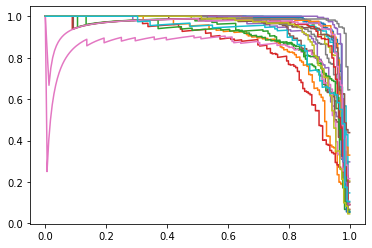

Precision: [0.94594595 0.83928571 0.84065934 0.80246914 0.84795322 0.83850932
 0.78282828 0.88541667 0.96341463 0.9382716  0.93582888 0.94318182
 0.81283422 0.9132948  0.98941799 0.86069652 0.92168675 0.9702381
 0.94927536 0.92156863]
Recall: [0.93959732 0.8245614  0.8547486  0.76923077 0.90625    0.82822086
 0.88068182 0.89473684 0.92397661 0.89411765 0.93085106 0.93258427
 0.89411765 0.91860465 0.93969849 0.96111111 0.92727273 0.96449704
 0.85064935 0.7704918 ]
F1 score: [0.94276094 0.83185841 0.84764543 0.78549849 0.87613293 0.83333333
 0.82887701 0.89005236 0.94328358 0.91566265 0.93333333 0.93785311
 0.85154062 0.91594203 0.96391753 0.90813648 0.9244713  0.96735905
 0.89726027 0.83928571]
Avg. F1 score: 0.8927835051546392


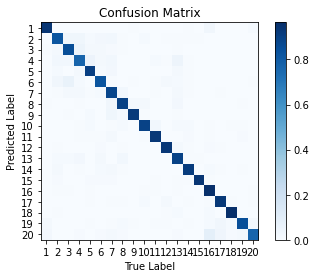

In [118]:
testing(model, test, len(dataset.target_names))

In [119]:
#logistic Regression with adjusted parameters
model = LogisticRegression(C = 0.1)
training(model, train, len(dataset.target_names), print_details=False)

Avg. F1 score: 0.999116050006314


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


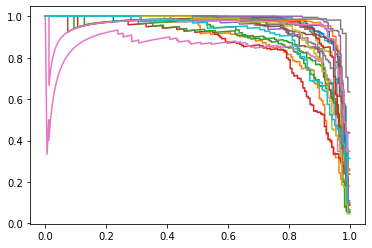

Precision: [0.94444444 0.80924855 0.83606557 0.80487805 0.84795322 0.82608696
 0.78217822 0.87830688 0.93939394 0.92682927 0.94054054 0.94857143
 0.80952381 0.89473684 0.99470899 0.82692308 0.92168675 0.97590361
 0.95555556 0.94736842]
Recall: [0.91275168 0.81871345 0.8547486  0.78106509 0.90625    0.81595092
 0.89772727 0.87368421 0.90643275 0.89411765 0.92553191 0.93258427
 0.9        0.88953488 0.94472362 0.95555556 0.92727273 0.95857988
 0.83766234 0.73770492]
F1 score: [0.92832765 0.81395349 0.84530387 0.79279279 0.87613293 0.82098765
 0.83597884 0.87598945 0.92261905 0.91017964 0.93297587 0.94050992
 0.85236769 0.89212828 0.96907216 0.88659794 0.9244713  0.96716418
 0.89273356 0.82949309]
Avg. F1 score: 0.8865979381443299


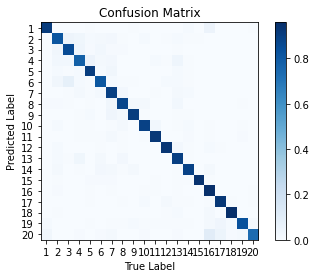

In [120]:
testing(model, test, len(dataset.target_names))

#### Let's tune vectorizer's parameters
Details are given [here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)  
e.g.
```
vectorizer = CountVectorizer(min_df=20) # min_df=1 by default
```


#### Let's tune regularization parameter
Details are given [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  
e.g.
```
model = LogisticRegression(C=0.1) # C=1.0 by default
```


## Compare multiple classifiers

- We use NB, SVM and RF
- See the performance with the default parameters  
- Compare it with those with tuned parameters
- Which model performs best in this problem?

### Naive Bayes
Multinomial Naive Bayes with a smoothing parameter (*alpha*)

In [123]:
#Naive Bayes with default parameters
model = MultinomialNB()
training(model, train, len(dataset.target_names), False)

Avg. F1 score: 0.9527718146230585


Avg. F1 score: 0.8565537555228276


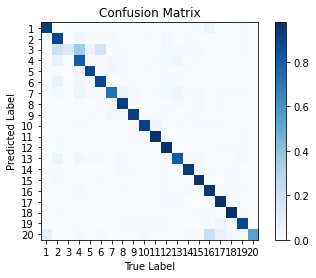

In [124]:
testing(model, test, len(dataset.target_names), False)

In [129]:
#Naive Bayes with adjusted parameters
model = MultinomialNB(alpha = 0.1)
training(model, train, len(dataset.target_names), False)

Avg. F1 score: 0.9672938502336154


Avg. F1 score: 0.8771723122238586


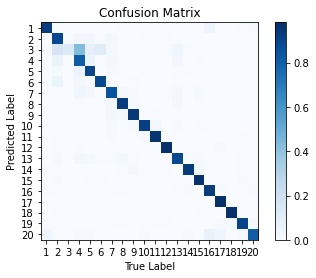

In [130]:
testing(model, test, len(dataset.target_names), False)

#### Let's tune a smoothing parameter
Details are given [here](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)

e.g.
```
model = MultinomialNB(alpha=0.1) # alpha=1.0 by default
```



### Support Vector Machine
Support Vector Machine with penalty parameter *C*

In [131]:
# SVC with default parameters
model = SVC()
training(model, train, len(dataset.target_names), False)

Avg. F1 score: 0.08852127793913371


Avg. F1 score: 0.0759941089837997


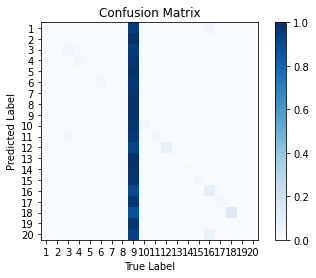

In [132]:
testing(model, test, len(dataset.target_names), False)

In [133]:
# SVC with adjusted parameters
model = SVC(kernel = 'poly')
training(model, train, len(dataset.target_names), False)

Avg. F1 score: 0.05821442101275413


Avg. F1 score: 0.05125184094256259


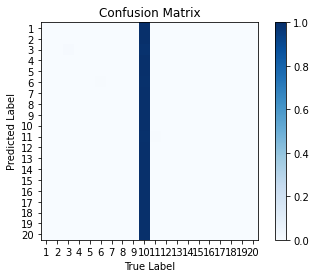

In [134]:
testing(model, test, len(dataset.target_names), False)

#### Let's tune some parameters
Details are given [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

e.g.
```
model = SVC(C=0.1) # C=1.0 by default
# or
model = SVC(kernel='linear') # kernel='rbf' by default
# or combine them
model = SVC(C=0.1, kernel='linear')
```



### Random Forest
Random Forest Classifier

In [135]:
#Randome Forest with default parameters
model = RandomForestClassifier()
training(model, train, len(dataset.target_names), False)

Avg. F1 score: 1.0


Avg. F1 score: 0.8521354933726067


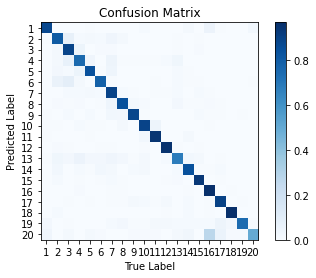

In [136]:
testing(model, test, len(dataset.target_names), False)

In [144]:
#Randome Forest with adjusted parameters
model = RandomForestClassifier(n_estimators=70)
training(model, train, len(dataset.target_names), False)

Avg. F1 score: 1.0


Avg. F1 score: 0.8444771723122239


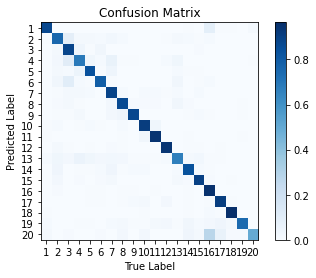

In [145]:
testing(model, test, len(dataset.target_names), False)

#### Let's tune some parameters
Details are given [here](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

e.g.
```
model = RandomForestClassifier(max_depth=30) # max_depth=None by default (i.e. no limit)
# or
model = RandomForestClassifier(n_estimators=20) # n_estimators=10 by default
# or combine them
model = RandomForestClassifier(max_depth=30, n_estimators=20)
```



# **Parameters changed**

**Logistic Regression Model:**

  Model with default parameters:
    
    (C = 1.0)
     F1 score on training dataset: 1.0.
     F1 score on testing dataset: 0.8927835051546392.
  Model with adjusted parameters:
    
    (C = 0.1)
     F1 score on training dataset: 0.999116050006314.
     F1 score on testing dataset: 0.8865979381443299.

    After comparing the two models, we can see that our model with default parameter works better.
    
    
  

**Naive Bayes Model:**

  Model with default parameters:

    (alpha = 1.0)
     F1 score on training dataset: 0.9527718146230585.
     F1 score on testing dataset: 0.8565537555228276
  
  Model with adjusted parameters:
    
    (alpha = 0.1)
    F1 score on training dataset: 0.9672938502336154
    F1 score on testing dataset: 0.8771723122238586

    After comparing the two models, we can see that our model with adjusted parameter works better.

**SVC Model:**

Model with default parameters:

    (kernel = ’rbf’)
     F1 score on training dataset: 0.08852127793913371.
     F1 score on testing dataset: 0.0759941089837997.
  
  Model with adjusted parameters:
    
    (kernel = poly)
    F1 score on training dataset: 0.05821442101275413.
    F1 score on testing dataset: 0.05125184094256259.

    After comparing the two models, we can see that our model with default parameter works better.

**Random Forest Model:**

Model with default parameters:

    (n_estimators=100)
     F1 score on training dataset: 1.0.
     F1 score on testing dataset: 0.8521354933726067.
  
  Model with adjusted parameters:
    
    (n_estimators=70)
    F1 score on training dataset: 1.0.
    F1 score on testing dataset: 0.8444771723122239.

    After comparing the two models, we can see that our model with adjusted parameter works better.







# **What metrics did we use to compare the result ?**

The metric that we used for the model is micro average F1 score.

# **Why do we use that metric ?**

F1 score is harmonic mean of precision and recall, this is useful because it consolidates these two numbers into one number that we can compare.

  F1 = 2*P*R/(P + R)

Since this is a multiclass classification problem, we need to use either micro average F1 score or macro average F1 score.
We choose micro average because we assume the distribution is the same in the real world.





# **Why do some models work better than others ?**

Among these four models, Logistic Regression model has the best performance while SVC has the worest performance.
Logistic Regreesion and Naive Bayes have the best performance because they work well on categorical variables while SVC does not work well because the model calculation is based on Euclidean distances.